Universidad Galileo  
Maestría en Data Science  
Statistical Learning II
Sección U  


   # **Tarea Practica 2: Detección de anomalias y reducción de dimensionalidad**


<p style="text-align: right;">
Henry Giovanni<br/>
Barrientos García<br/>
21001538<br/>
Guatemala, 28 de julio de 2021<br/>
</p>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pandas
%matplotlib inline
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

In [18]:
dataset = np.loadtxt("estaturas.xlsx - normales.csv", delimiter=',', skiprows=1)
dataset_cv = np.loadtxt("estaturas.xlsx - valtest(normales).csv", delimiter=',', skiprows=1)
dataset_cv = np.array_split(dataset_cv, 2)[0]
dataset_tg = np.zeros(dataset_cv.shape[0])
# dataset_tg = np.loadtxt("estaturas.xlsx - valtest(anomalias).csv", delimiter=',', skiprows=1)
# dataset_tg = np.array_split(dataset_tg, 2)[0]
ds_rows = np.shape(dataset)[0]
ds_cols = np.shape(dataset)[1]

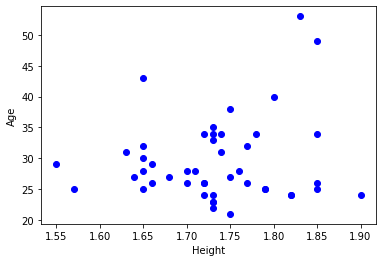

In [8]:
plt.xlabel('Height')
plt.ylabel('Age')
plt.plot(dataset[:,0], dataset[:,1], 'bo')
plt.show()

In [9]:
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset, mu, sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

def selectThresholdByCV(probs, gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000
    epsilons = np.arange(min(probs), max(probs), stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon) 
        #print(predictions)
        f = f1_score(gt, predictions, average='binary')
        #print(f)
        #print('------')
        if f > best_f1:
            #print('----')
            best_f1 = f
            best_epsilon = epsilon
    return best_f1, best_epsilon

In [11]:
mu, sigma = estimateGaussian(dataset)
p = multivariateGaussian(dataset, mu, sigma)

In [19]:
#selecting optimal value of epsilon using cross validation
p_cv = multivariateGaussian(dataset_cv, mu, sigma)
fscore, ep = selectThresholdByCV(p_cv, dataset_tg)
print(ep)

C:\Users\hbarrientosg\Anaconda3\envs\TareasSLII\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


0


array([0., 0., 0., 0.])